In [1]:
import pandas as pd
import statsmodels.api as sm
from helper import ordinary_lest_squares_regression

%matplotlib inline

#HSBC and ETF data was from Nasdaq and all other columns were from Ken French https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/index.html
df = pd.read_excel("HSBC.ods", engine="odf")

In [2]:

# cleaning data, data from French is already expressed  in percent
for column in ["XLF-rf","IXG-rf","HSBC-rf"]:
    df[column] = pd.to_numeric(df[column],errors='coerce')*100
df_cleaned = df.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1202 entries, 53 to 1254
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1202 non-null   object 
 1   HSBC Close/Last  1202 non-null   object 
 2   Volume           1202 non-null   int64  
 3   Open             1202 non-null   object 
 4   High             1202 non-null   object 
 5   Low              1202 non-null   object 
 6   HSBC return      1202 non-null   object 
 7   XLF Close/Last   1202 non-null   float64
 8   XLF return       1202 non-null   object 
 9   IXG Close/Last   1202 non-null   float64
 10  IXG return       1202 non-null   object 
 11  Mkt-RF           1202 non-null   float64
 12  SMB              1202 non-null   float64
 13  HML              1202 non-null   float64
 14  RMW              1202 non-null   float64
 15  CMA              1202 non-null   float64
 16  RF               1202 non-null   float64
 17  XLF-rf           1

correlation table

In [3]:
df_cleaned[['Mkt-RF', 'SMB', 'HML','RMW', 'CMA', 'XLF-rf','IXG-rf','Banks-rf', 'Insur-rf', 'RlEst-rf','Fin  -rf','HSBC-rf']].corr()

,Mkt-RF,SMB,HML,RMW,CMA,XLF-rf,IXG-rf,Banks-rf,Insur-rf,RlEst-rf,Fin -rf,HSBC-rf
Mkt-RF,1.000000,0.241713,-0.149459,-0.231911,-0.334568,0.667645,0.665665,0.772806,0.701076,0.787788,0.872955,0.304714
SMB,0.241713,1.000000,0.341334,-0.300474,0.056323,0.336009,0.320983,0.445459,0.210226,0.518404,0.367765,0.201876
HML,-0.149459,0.341334,1.000000,0.402650,0.602861,0.335870,0.288290,0.398252,0.247018,0.124394,0.148594,0.300325
RMW,-0.231911,-0.300474,0.402650,1.000000,0.332726,-0.025180,-0.041786,-0.058386,0.041845,-0.203812,-0.188287,0.055650
CMA,-0.334568,0.056323,0.602861,0.332726,1.000000,-0.016949,-0.020420,-0.070568,0.003107,-0.182833,-0.204975,0.114450
XLF-rf,0.667645,0.336009,0.335870,-0.025180,-0.016949,1.000000,0.967325,0.814004,0.680716,0.653767,0.770289,0.618767
IXG-rf,0.665665,0.320983,0.288290,-0.041786,-0.020420,0.967325,1.000000,0.766868,0.642052,0.646327,0.738759,0.689784
Banks-rf,0.772806,0.445459,0.398252,-0.058386,-0.070568,0.814004,0.766868,1.000000,0.737845,0.774963,0.886440,0.451253
Insur-rf,0.701076,0.210226,0.247018,0.041845,0.003107,0.680716,0.642052,0.737845,1.000000,0.613500,0.730809,0.332055
RlEst-rf,0.787788,0.518404,0.124394,-0.203812,-0.182833,0.653767,0.646327,0.774963,0.613500,1.000000,0.800856,0.345507


With IXG only

['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'IXG-rf']
                            OLS Regression Results                            
Dep. Variable:                HSBC-rf   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     217.1
Date:                Wed, 26 Mar 2025   Prob (F-statistic):          2.55e-187
Time:                        21:36:18   Log-Likelihood:                -2114.0
No. Observations:                1202   AIC:                             4242.
Df Residuals:                    1195   BIC:                             4278.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

/home/george/HSBC/helper.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.show()
/home/george/HSBC/helper.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.show()


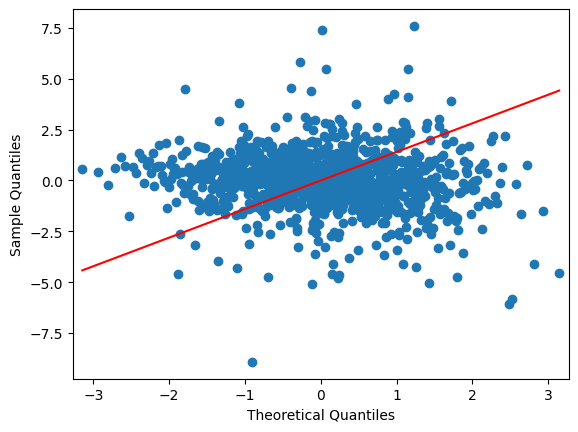

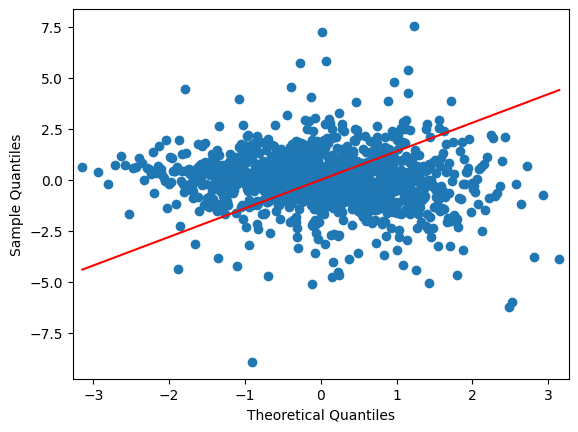

In [4]:
column_combos = [['Mkt-RF', 'SMB', 'HML',
       'RMW', 'CMA', 'IXG-rf'],['Mkt-RF', 'SMB', 'HML',
       'RMW', 'CMA', 'IXG-rf','Banks-rf', 'Insur-rf', 'RlEst-rf','Fin  -rf']]

y = df_cleaned["HSBC-rf"]

for column_combo in column_combos:
    
    print(column_combo)
    X = sm.add_constant(df_cleaned[column_combo])
    results,df_residual = ordinary_lest_squares_regression(y=y,X=X)
    


With XLF only

['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'XLF-rf']
                            OLS Regression Results                            
Dep. Variable:                HSBC-rf   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     138.1
Date:                Wed, 26 Mar 2025   Prob (F-statistic):          6.61e-133
Time:                        21:36:18   Log-Likelihood:                -2240.5
No. Observations:                1202   AIC:                             4495.
Df Residuals:                    1195   BIC:                             4531.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

/home/george/HSBC/helper.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.show()
/home/george/HSBC/helper.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.show()


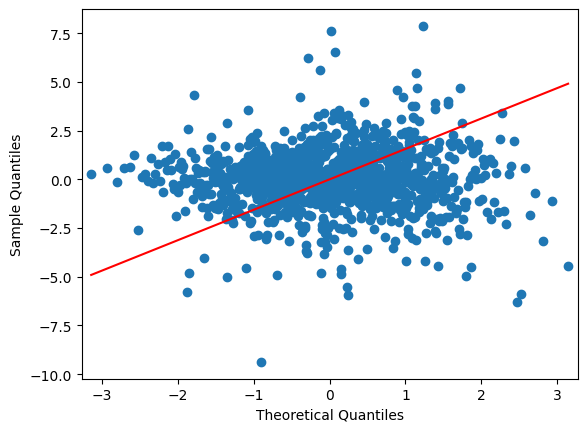

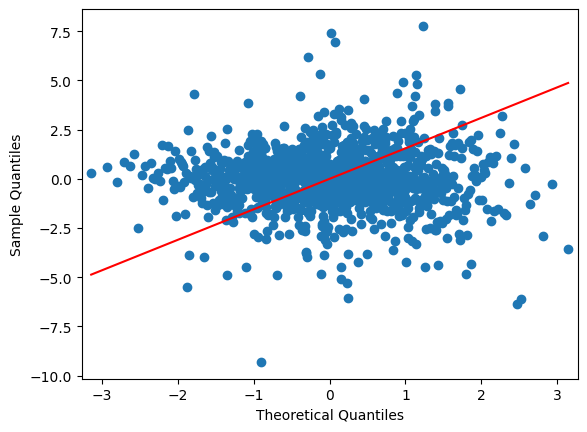

In [5]:
column_combos = [['Mkt-RF', 'SMB', 'HML',
       'RMW', 'CMA', 'XLF-rf'],['Mkt-RF', 'SMB', 'HML',
       'RMW', 'CMA', 'XLF-rf','Banks-rf', 'Insur-rf', 'RlEst-rf','Fin  -rf']]

for column_combo in column_combos:
    print(column_combo)
    X = sm.add_constant(df_cleaned[column_combo])
    results,df_residual = ordinary_lest_squares_regression(y=y,X=X)

Both XLF and IXG

['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'XLF-rf', 'IXG-rf']
                            OLS Regression Results                            
Dep. Variable:                HSBC-rf   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     210.2
Date:                Wed, 26 Mar 2025   Prob (F-statistic):          3.58e-203
Time:                        21:36:19   Log-Likelihood:                -2074.4
No. Observations:                1202   AIC:                             4165.
Df Residuals:                    1194   BIC:                             4205.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

/home/george/HSBC/helper.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.show()
/home/george/HSBC/helper.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.show()


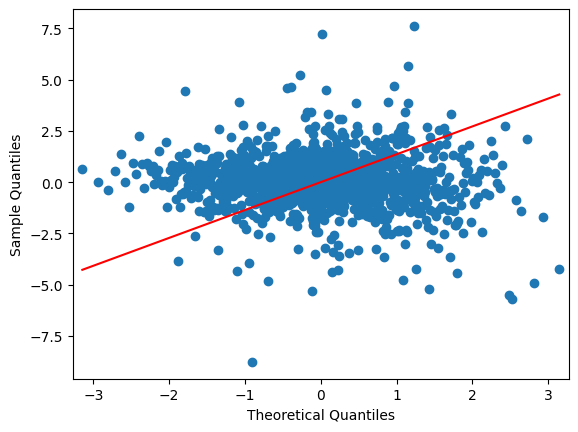

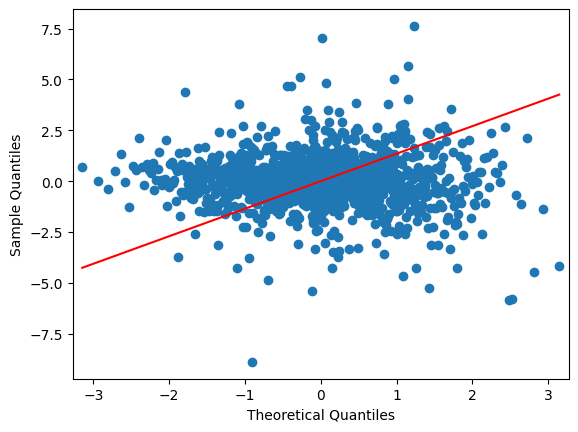

In [6]:
column_combos = [['Mkt-RF', 'SMB', 'HML',
       'RMW', 'CMA', 'XLF-rf',"IXG-rf"],['Mkt-RF', 'SMB', 'HML',
       'RMW', 'CMA', 'XLF-rf',"IXG-rf",'Banks-rf', 'Insur-rf', 'RlEst-rf','Fin  -rf']]

for column_combo in column_combos:
    print(column_combo)
    X = sm.add_constant(df_cleaned[column_combo])
    results,df_residual = ordinary_lest_squares_regression(y=y,X=X)


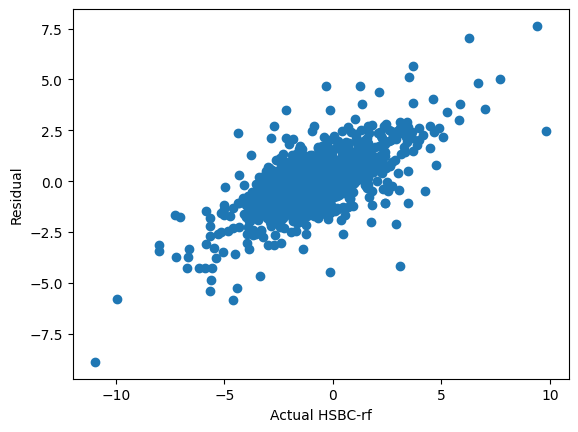

In [7]:
from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel("Actual HSBC-rf")
ax.set_ylabel("Residual")
ax.plot(df_cleaned["HSBC-rf"],df_residual["error"],'o')
plt.show()